## Import Movie Regression Data

In [1]:
pwd

'C:\\Users\\Adebayo.Ogundele\\Desktop\\Jupyter'

Splitting a data to get your threshold in making your decision tree depends on the least value of your RSS - Residual square error

An approach to take is Recursive Binary Splitting

Case Study:

Use the Movie Regression Data with Collection as independent variables, predict the value of collection using the values from other independent variables

That is if you are creating a new movie, predict how much it will make (collection) in the box office

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Users\\adebayo.ogundele\\Desktop\\ML Learning\\Decision Trees\\Movie_regression.csv", header = 0)

In [5]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [6]:
df.shape

(506, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

There are 506 observations for the variables. However time_taken is 494, having a missing values

## Missing Value Treatment

In [8]:
df.Time_taken.mean()

157.39149797570855

In [9]:
df.Time_taken = df.Time_taken.fillna(df.Time_taken.mean(), inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           0 non-null      object 
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

## Dummy Variable Creation
#### Converting all categorical variables into numerical variables

In [11]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,None,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,None,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,None,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,None,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,None,225.792,Drama,55,395,72400


There are two categorical variables: 3D_available and Genre

In [12]:
df = pd.get_dummies(df, drop_first=True)

In [13]:
df

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,225.792,55,395,72400,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480,243.584,27,561,44800,0,0,0,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875,263.296,20,600,41200,1,0,0,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239,243.824,31,576,47800,0,1,0,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077,303.520,47,607,44000,1,1,0,0


You must always delete one short of the number of categories in dummy variables

In [14]:
del df['3D_available_NO']

KeyError: '3D_available_NO'

In [ ]:
del df['Genre_Action']

In [16]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,225.792,55,395,72400,0,0,1,0


## Independent - Dependent Variables Split (x -y split)

In this data frame, our dependent variable (y) is  Collection while the independent variables are the other 17 variables

In [17]:
#give x all the 18 variables at once
x = df.loc[:,df.columns != 'Collection']

In [18]:
x.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,223.840,23,494,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,2022.400,38,458,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,225.792,55,395,0,0,1,0


In [19]:
type(x)

pandas.core.frame.DataFrame

In [20]:
x.shape

(506, 18)

In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Twitter_hastags      506 non-null    float64
 12  Avg_age_actors       506 non-null    int64  
 13  Num_multiplex        506 non-null    int64  
 14  3D_available_YES     506 non-null    uint8  
 15  Genre_Comedy         506 non-null    uin

with this now, x stores all variables except collection

In [22]:
#give collection to y
y = df['Collection']

In [23]:
y.head()

0    48000
1    43200
2    69400
3    66800
4    72400
Name: Collection, dtype: int64

In [24]:
type(y)

pandas.core.series.Series

In [25]:
y.shape

(506,)

## Splitting Data into Test and Train

In [26]:
 from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state = 0)

In [28]:
x_train.shape

(404, 18)

In [29]:
x_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,224.272,23,536,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,263.472,46,400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,224.320,24,387,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,243.664,41,522,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,301.664,60,589,1,0,0,0


In [30]:
y_train.shape

(404,)

## Decision Tree Model
##### Regression Tree

In [31]:
from sklearn import tree

In [32]:
#regtree = Regression Tree Classifier
regtree = tree.DecisionTreeRegressor(max_depth=3)

In [33]:
regtree #max_depth is  number of layers in your tree

DecisionTreeRegressor(max_depth=3)

To make your tree interpretable, do not extend your depth beyond 5

In [34]:
#fit the model on train data
regtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

### Predict Values of y using both x_train and x_test

In [35]:
y_train_pred = regtree.predict(x_train)

In [36]:
y_test_pred = regtree.predict(x_test)

In [37]:
y_test_pred

array([ 46187.35632184, 100000.        ,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  23514.28571429,  23514.28571429,
        23514.28571429,  23514.28571429,  91860.86956522,  65183.33333333,
        46187.35632184,  65183.33333333,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        91860.86956522,  35137.77777778,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        23514.28571429, 100000.        ,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  35137.77777778,  35137.77777778,
        35137.77777778,  46187.35632184,  35137.77777778,  35137.77777778,
        46187.35632184,  

### Model Performance

In [38]:
from sklearn.metrics import r2_score, mean_squared_error

In [39]:
mean_squared_error(y_test, y_test_pred)

117077216.27161306

In [40]:
r2_score(y_train, y_train_pred)

0.8364651040556869

In [41]:
r2_score(y_test, y_test_pred)

0.636321038122745

For good models, r2_score values lies between 0.4 and 0.8. If it is 0, then no fit, if it is 1, then there is fit


No such range for mean_squared_error. No comparison

### Creating Decision Tree

In [42]:
dot_data = tree.export_graphviz(regtree, out_file=None)

In [43]:
from IPython.display import Image

In [44]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=6be6d7e8cd50f10c3297cf04b9217cd6a66d3c8b1010c860b1c6fe0403289005
  Stored in directory: c:\users\adebayo.ogundele\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [45]:
import pydotplus

In [46]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [47]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


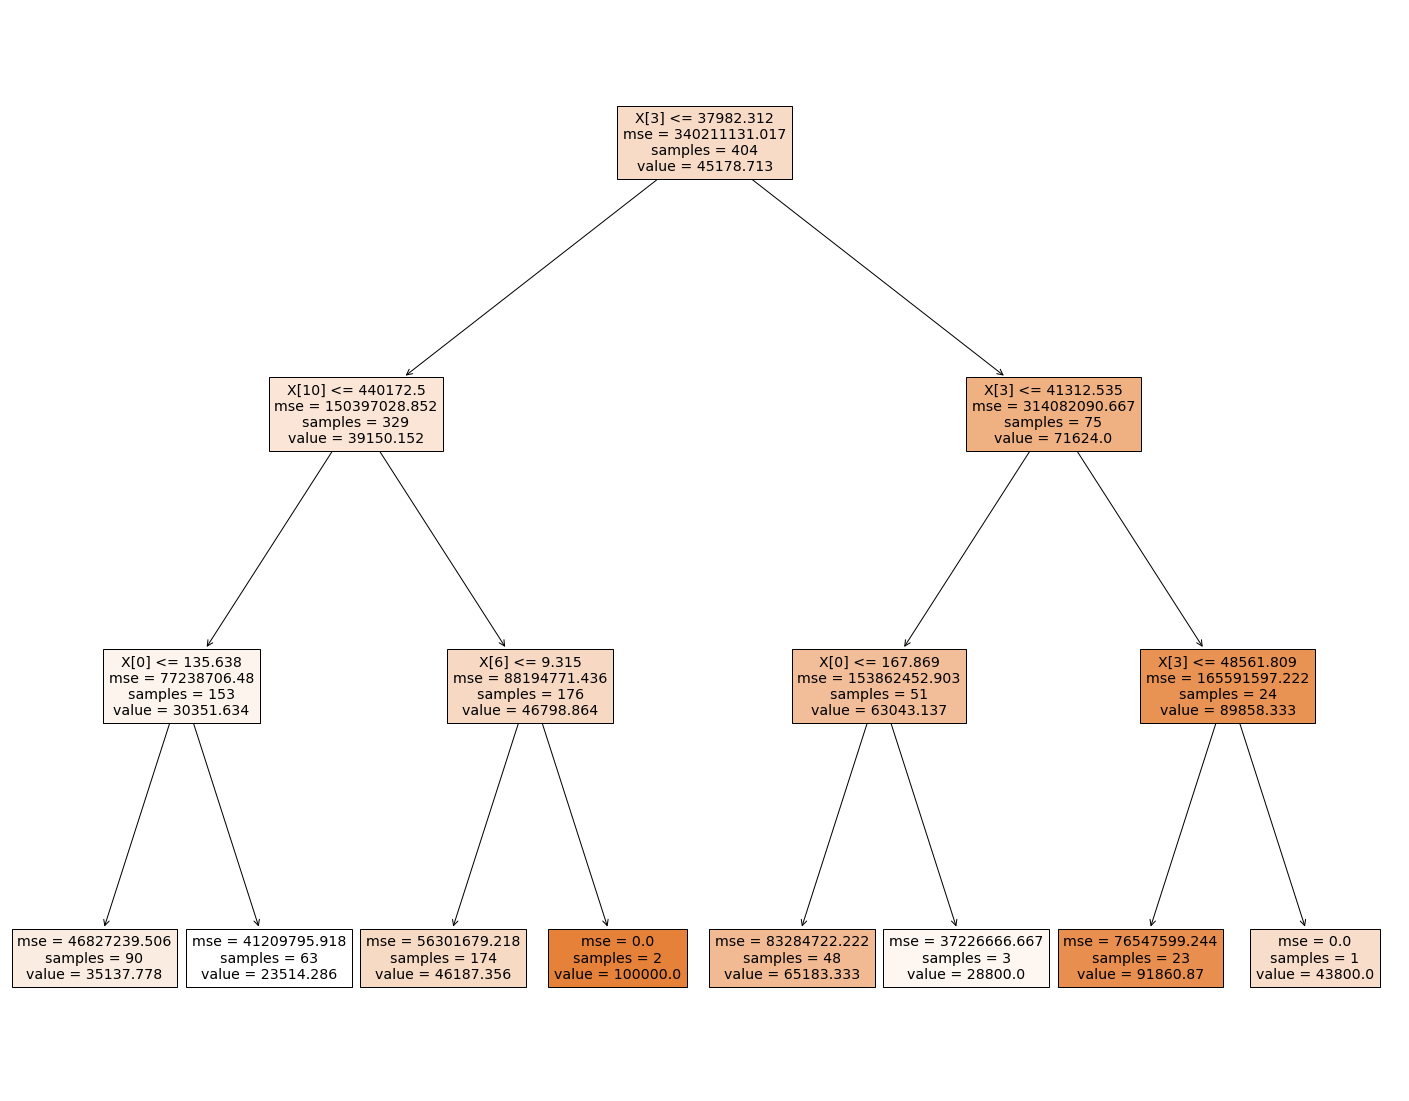

In [48]:
#tree created using plot_tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regtree,filled=True)

#### Weakest Link Pruning
### Controlling Tree Growth

#### a. Maximum number of levels in tree

In [49]:
regtree1 = tree.DecisionTreeRegressor(max_depth=3)

In [50]:
regtree1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

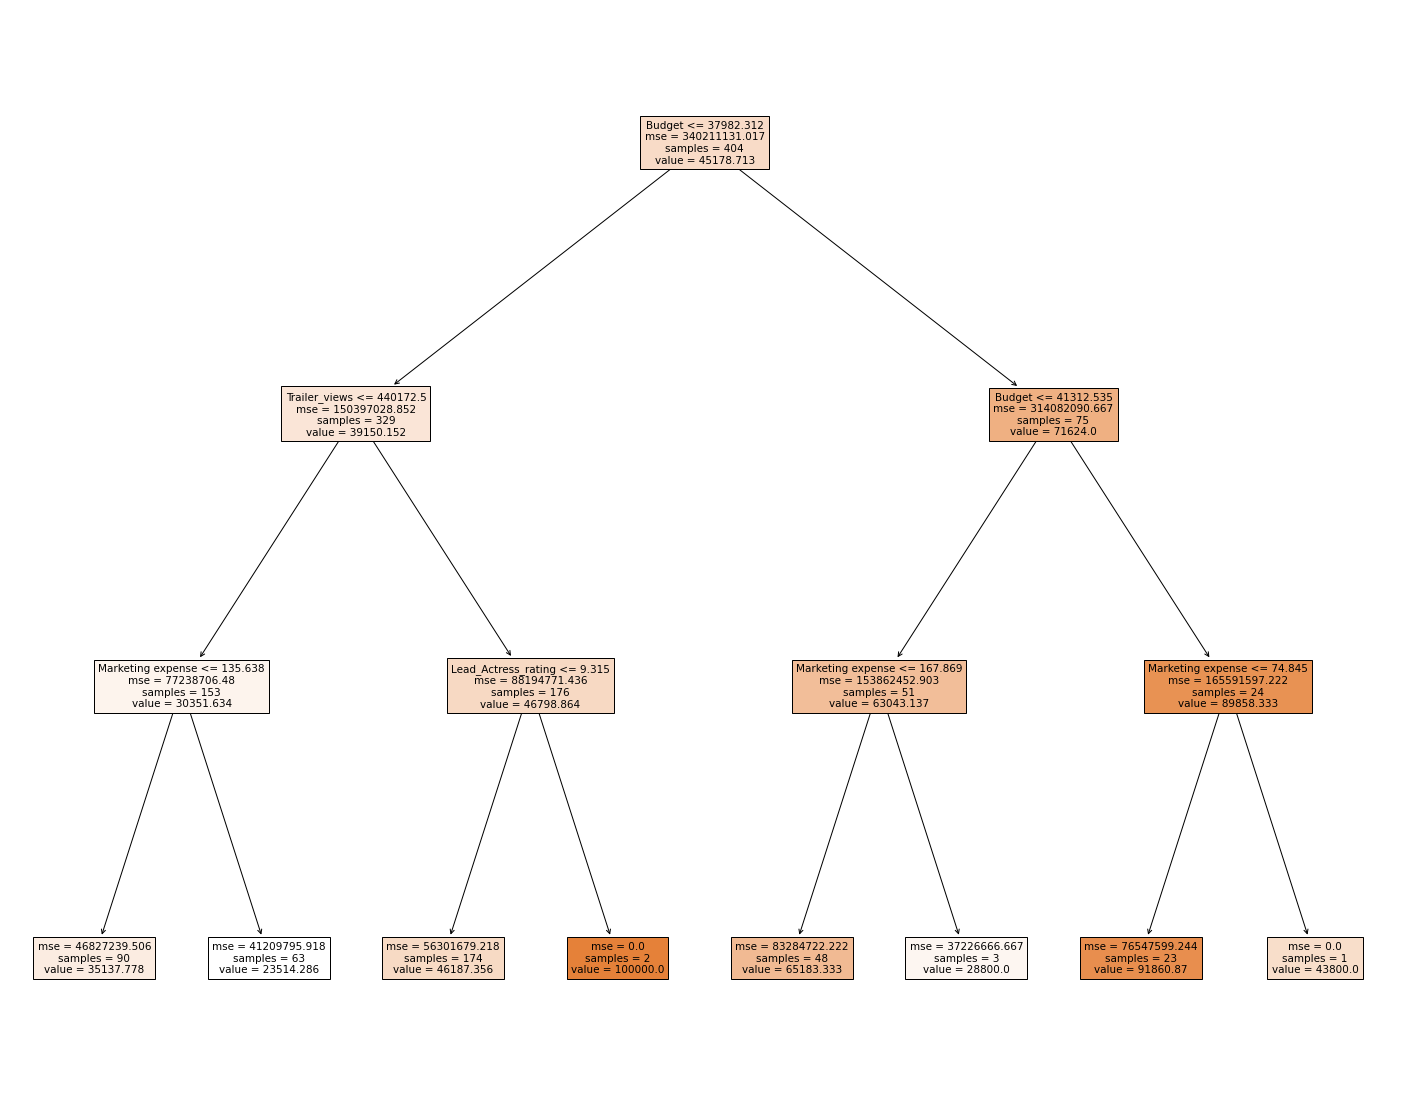

In [51]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regtree1,feature_names = x_train.columns, filled=True)

#### b. Minimum observations at internal node

In [52]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split=40)

In [53]:
regtree2.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_split=40)

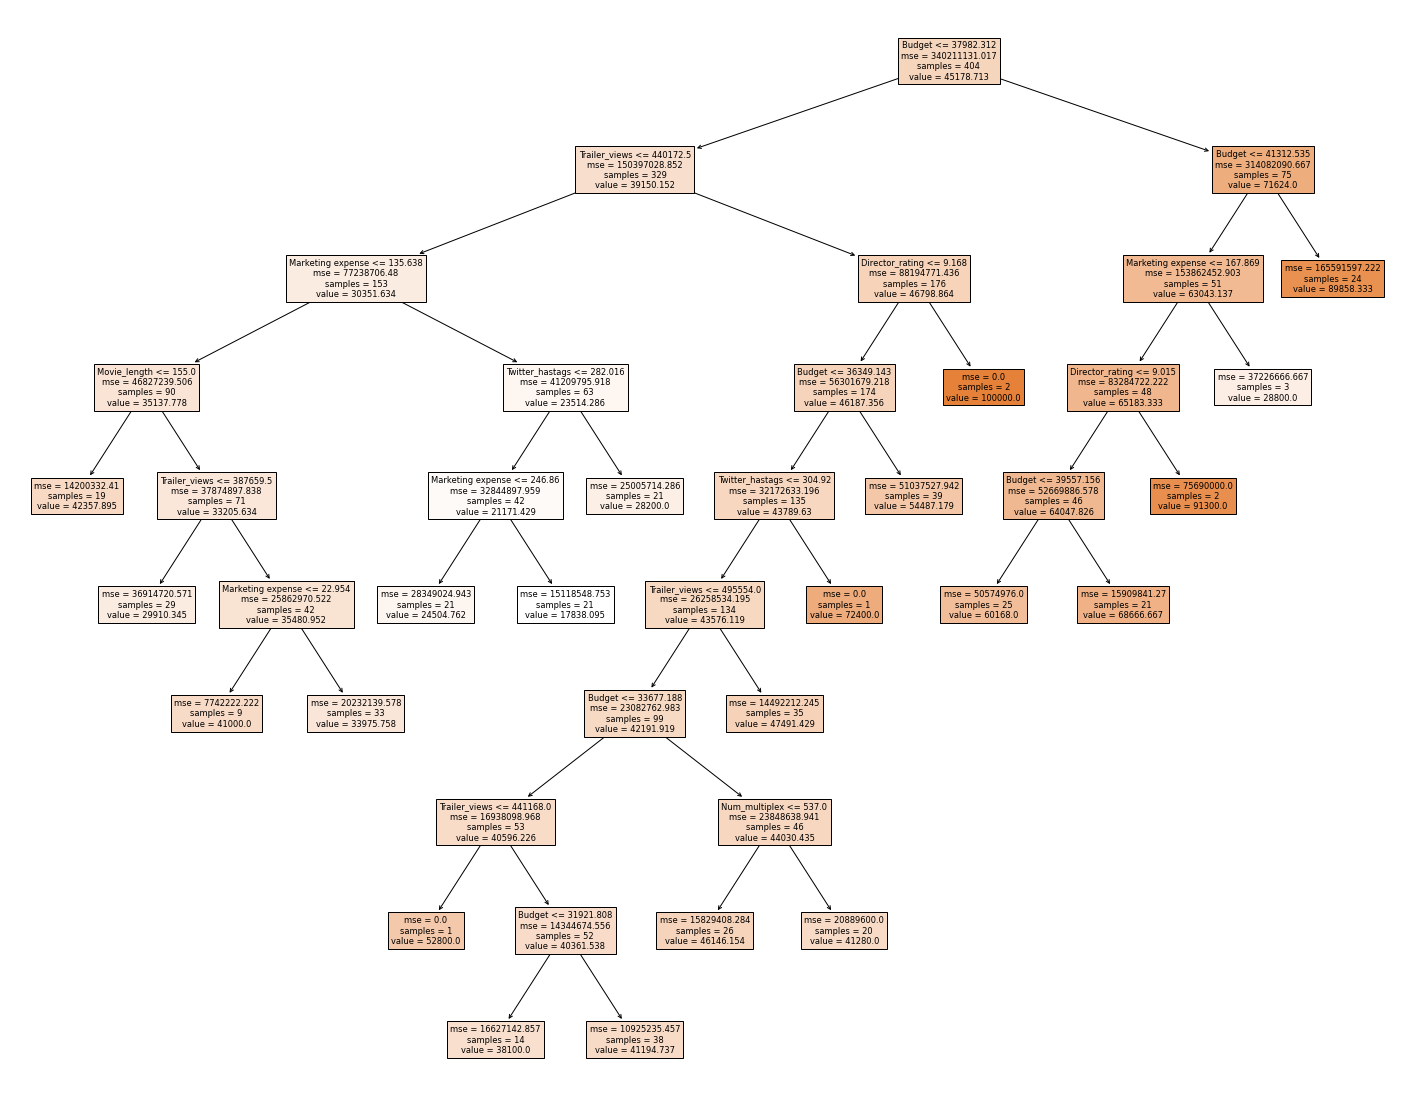

In [54]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regtree2,feature_names = x_train.columns, filled=True)

### c. Minimum Observations at Leaf Node

In [55]:
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf=25, max_depth=4)

In [56]:
regtree3.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=25)

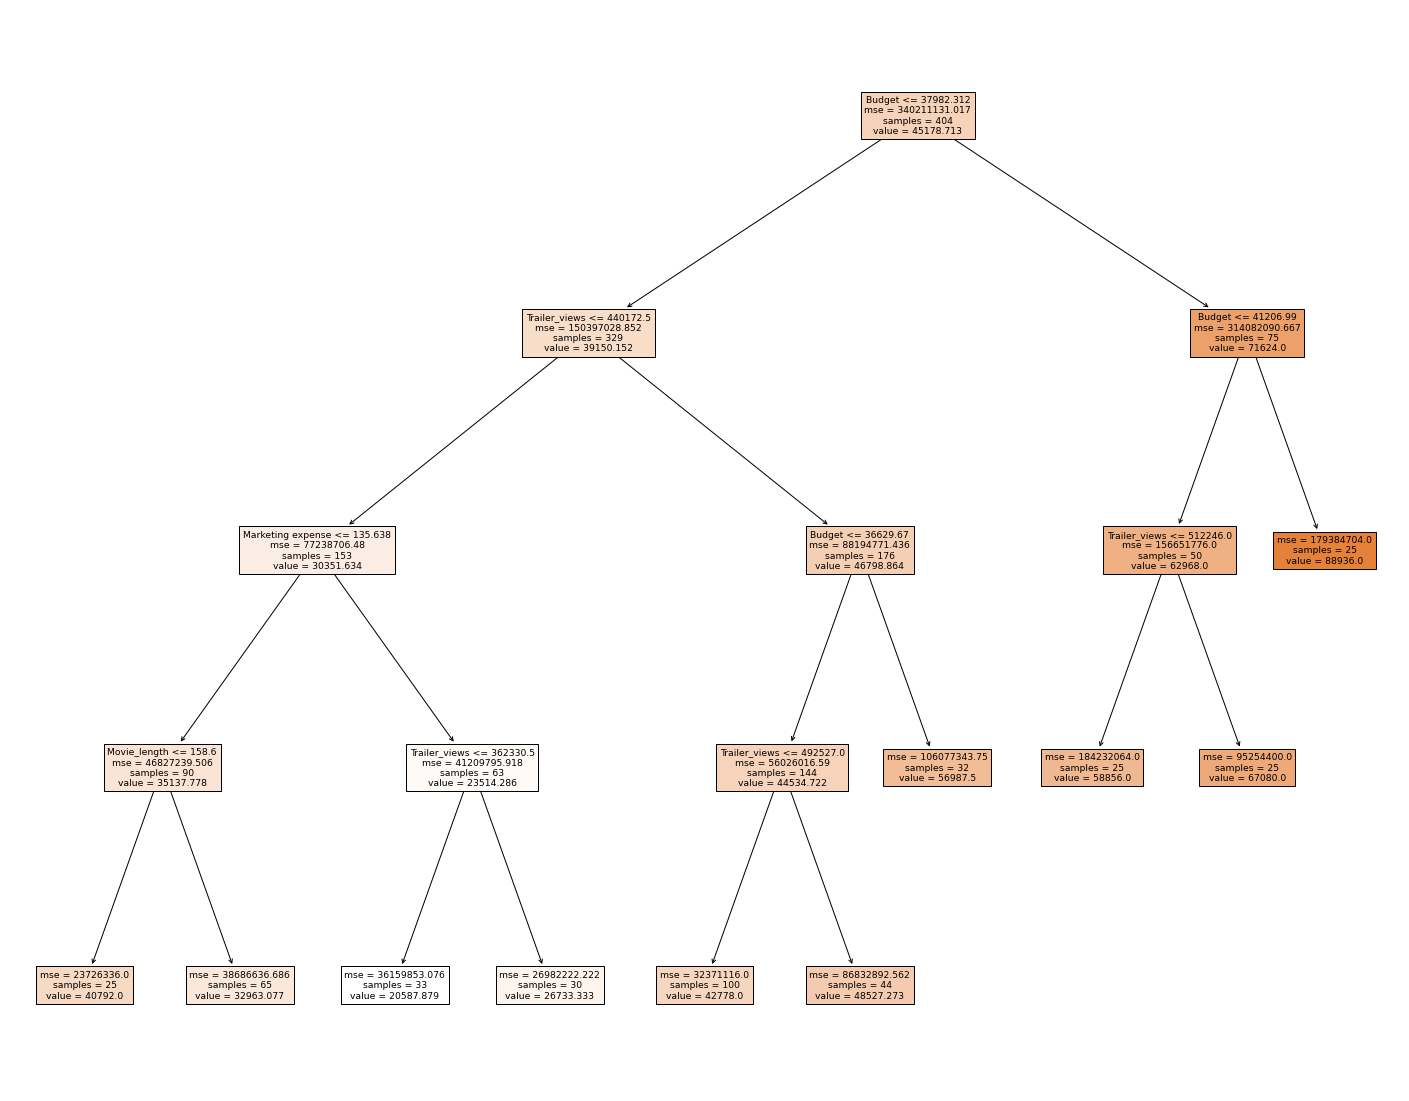

In [57]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regtree3,feature_names = x_train.columns, filled=True)